# 데이터 확인

In [ ]:
import os

# 상위 폴더 경로
root_dir = 'meta_data'

# 결과 저장
for subfolder in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # 파일 목록 수집
    files = os.listdir(subfolder_path)
    csv_files = {os.path.splitext(f)[0] for f in files if f.endswith('.csv')}
    json_files = {os.path.splitext(f)[0] for f in files if f.endswith('.json')}

    # 페어 확인
    paired = csv_files & json_files
    only_csv = csv_files - json_files
    only_json = json_files - csv_files

    # 출력
    print(f"📂 폴더: {subfolder}")
    print(f"  - CSV 파일 수: {len(csv_files)}")
    print(f"  - JSON 파일 수: {len(json_files)}")
    print(f"  - 매칭된 페어 수: {len(paired)}")
    
    if only_csv:
        print(f"  ⚠️ 매칭되지 않은 CSV 파일 ({len(only_csv)}개):")
        for name in sorted(only_csv):
            print(f"    - {name}.csv")

    if only_json:
        print(f"  ⚠️ 매칭되지 않은 JSON 파일 ({len(only_json)}개):")
        for name in sorted(only_json):
            print(f"    - {name}.json")

    print("-" * 50)


📂 폴더: 1. 한국일반
  - CSV 파일 수: 31027
  - JSON 파일 수: 31027
  - 매칭된 페어 수: 31027
--------------------------------------------------
📂 폴더: 2. 한국생활I
  - CSV 파일 수: 30877
  - JSON 파일 수: 30877
  - 매칭된 페어 수: 30877
--------------------------------------------------
📂 폴더: 3. 한국생활II
  - CSV 파일 수: 32792
  - JSON 파일 수: 32792
  - 매칭된 페어 수: 32792
--------------------------------------------------
📂 폴더: 4. 한국문화I
  - CSV 파일 수: 31958
  - JSON 파일 수: 31958
  - 매칭된 페어 수: 31958
--------------------------------------------------
📂 폴더: 5. 한국문화II
  - CSV 파일 수: 28478
  - JSON 파일 수: 28478
  - 매칭된 페어 수: 28478
--------------------------------------------------


In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

# matplotlib findfont 경고 끄기
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")

# NotoSansCJK 폰트 경로 지정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False


/tmp/ipykernel_2239335/3461471830.py:42: UserWarning: Glyph 128193 (\N{FILE FOLDER}) missing from font(s) Noto Sans CJK JP.
  plt.tight_layout()
/home/dibaeck/sketch/anaconda3/envs/dibk311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128193 (\N{FILE FOLDER}) missing from font(s) Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)


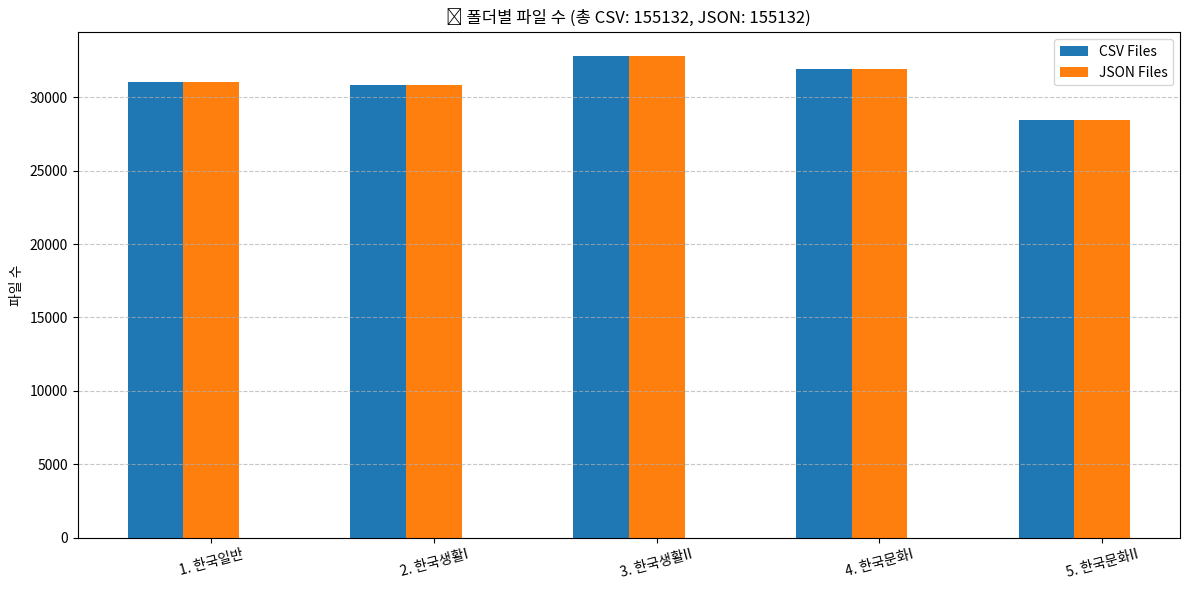

In [ ]:
# 경로 설정
root_dir = 'meta_data'

# 폴더별 통계 저장
folder_names = []
csv_counts = []
json_counts = []

# 데이터 수집
for subfolder in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    files = os.listdir(subfolder_path)
    csv_files = {os.path.splitext(f)[0] for f in files if f.endswith('.csv')}
    json_files = {os.path.splitext(f)[0] for f in files if f.endswith('.json')}

    # 데이터 저장
    folder_names.append(subfolder)
    csv_counts.append(len(csv_files))
    json_counts.append(len(json_files))
    

# 총합
total_csv = sum(csv_counts)
total_json = sum(json_counts)

# 📊 그래프 그리기
x = range(len(folder_names))
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width for i in x], csv_counts, width=bar_width, label='CSV Files')
plt.bar(x, json_counts, width=bar_width, label='JSON Files')

plt.xticks(x, folder_names, rotation=15)
plt.ylabel("파일 수")
plt.title(f"📁 폴더별 파일 수 (총 CSV: {total_csv}, JSON: {total_json})")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---
### CSV 파일 확인

In [ ]:
import os
import pandas as pd
import charset_normalizer

root_dir = 'meta_data'

for subfolder in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    csv_files = [f for f in os.listdir(subfolder_path) if f.endswith('.csv')]
    if not csv_files:
        print(f"[{subfolder}] ❌ CSV 파일 없음\n")
        continue

    sample_csv = os.path.join(subfolder_path, csv_files[0])
    print(f"📂 폴더: {subfolder}")
    print(f"  ▶ 샘플 파일: {csv_files[0]}")

    try:
        with open(sample_csv, 'rb') as f:
            result = charset_normalizer.from_bytes(f.read(50000)).best()
            detected_encoding = result.encoding

        df = pd.read_csv(sample_csv, encoding=detected_encoding)

        print(f"  ┌ 인코딩: {detected_encoding}")
        print(f"  ├ 열 개수: {len(df.columns)}")
        print(f"  ├ 행 개수: {len(df)}")
        print(f"  ├ 열 목록:")
        print(f"  │   {list(df.columns)}")

        row = df.iloc[0]
        print(f"  └ 데이터 샘플 (앞 1줄):")
        print(f"      - fileName: {row.get('fileName', '')}")
        print(f"      - speakerID: {row.get('speakerID', '')}")
        print(f"      - Reading: {row.get('Reading', '')[:80]}...")
        print(f"      - ReadingLabelText: {row.get('ReadingLabelText', '')[:80]}...")
        print(f"      - country: {row.get('country', '')}, motherTongue: {row.get('motherTongue', '')}, topikGrade: {row.get('topikGrade', '')}")

    except Exception as e:
        print(f"  ⚠️ 오류 발생: {e}")

    print("-" * 60)


📂 폴더: 1. 한국일반
  ▶ 샘플 파일: VN17RC163_VN0230_20210810.csv
  ┌ 인코딩: cp949
  ├ 열 개수: 25
  ├ 행 개수: 1
  ├ 열 목록:
  │   ['fileName', 'speakerID', 'sentenceID', 'recordUnit', 'recordQuality', 'recordDate', 'recordTime', 'Reading', 'ReadingLabelText', 'Question', 'AnswerLabelText', 'SentenceSpeechLV', 'SpeakerID', 'gender', 'birthYear', 'eduBackground', 'country', 'residencePeriod', 'residenceCity', 'languageClass', 'motherTongue', 'selfAssessment', 'topikGrade', 'LearningPeriod', 'learningSource']
  └ 데이터 샘플 (앞 1줄):
      - fileName: VN17RC163_VN0230_20210810.wav
      - speakerID: VN0230
      - Reading: 작년 여름에 태풍이 진짜 크게 오지 않았어요? 유리창이 흔들리고, 나무도 뽑혀서 정말 무서웠어요....
      - ReadingLabelText: 작년 여름에 태풍이 진짜 크게 오지 않았어요 유리창이 흔들리고 나무도 뽑혀서 정말 무서웠어요...
      - country: KR, motherTongue: 베트남어, topikGrade: 4
------------------------------------------------------------
📂 폴더: 2. 한국생활I
  ▶ 샘플 파일: VN23RB056_VN0398_20211005.csv
  ┌ 인코딩: cp949
  ├ 열 개수: 25
  ├ 행 개수: 1
  ├ 열 목록:
  │   ['fileName', 'speakerID', 'sen

---
### json파일 확인

In [ ]:
import os
import json
import charset_normalizer

def print_json_summary(file_path):
    # 인코딩 자동 감지
    with open(file_path, 'rb') as f:
        result = charset_normalizer.from_bytes(f.read(50000)).best()
        detected_encoding = result.encoding

    with open(file_path, 'r', encoding=detected_encoding) as f:
        data = json.load(f)

    print(f"파일명: {os.path.basename(file_path)}")
    print(f"인코딩: {detected_encoding}")
    print("-" * 40)

    print(f"fileName: {data.get('fileName', '')}")

    file_info = data.get('file_info', {})
    print("file_info:")
    for key in ['speakerID', 'sentenceID', 'recordUnit', 'recordQuality', 'recordDate', 'recordTime']:
        print(f"  {key}: {file_info.get(key, '')}")

    transcription = data.get('transcription', {})
    print("transcription:")
    for key in ['Reading', 'ReadingLabelText', 'Question', 'AnswerLabelText', 'SentenceSpeechLV']:
        print(f"  {key}: {transcription.get(key, '')}")

    print(f"SpeakerID: {data.get('SpeakerID', '')}")

    basic_info = data.get('basic_info', {})
    print("basic_info:")
    for key in ['gender', 'birthYear', 'eduBackground']:
        print(f"  {key}: {basic_info.get(key, '')}")

    residence_info = data.get('residence_info', {})
    print("residence_info:")
    for key in ['country', 'residencePeriod', 'residenceCity']:
        print(f"  {key}: {residence_info.get(key, '')}")

    skill_info = data.get('skill_info', {})
    print("skill_info:")
    for key in ['languageClass', 'motherTongue', 'selfAssessment', 'topikGrade', 'LearningPeriod', 'learningSource']:
        print(f"  {key}: {skill_info.get(key, '')}")

    print("-" * 40)

# 예시: 파일 경로만 바꿔서 실행해보세요
sample_path = './meta_data/1. 한국일반/VN10QC226_VN0005_20210801.json'
print_json_summary(sample_path)


파일명: VN10QC226_VN0005_20210801.json
인코딩: utf_8
----------------------------------------
fileName: VN10QC226_VN0005_20210801.wav
file_info:
  speakerID: VN0005
  sentenceID: VN10QC226
  recordUnit: ios
  recordQuality: 16bit 16kHz MONO
  recordDate: 2021-08-01 04:52:55
  recordTime: 11.164
transcription:
  Reading: 
  ReadingLabelText: 
  Question: 당신은 어느 나라에서 왔나요? 한국에 온 이유는 무엇인가요?
  AnswerLabelText: 저는 베트남에서 왔어요 박사 과정을 진학하기 위해서 한국에 왔습니다
  SentenceSpeechLV: 중
SpeakerID: VN0005
basic_info:
  gender: F
  birthYear: 1991
  eduBackground: 석사이상
residence_info:
  country: VN
  residencePeriod: 3년 이상 5년 미만
  residenceCity: KR-11
skill_info:
  languageClass: 베트남어
  motherTongue: 베트남어
  selfAssessment: 상
  topikGrade: 6
  LearningPeriod: 62
  learningSource: 학교 수업 (대학 포함)
----------------------------------------


---
### 원천 데이터(음원)

In [1]:
import os

# 상위 폴더 경로
root_dir = 'raw_data'

# 결과 저장
for subfolder in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # 파일 목록 수집
    files = os.listdir(subfolder_path)
    wav_files = {os.path.splitext(f)[0] for f in files if f.endswith('.wav')}

    # 출력
    print(f"📂 폴더: {subfolder}")
    print(f"  - wav 파일 수: {len(wav_files)}")

    print("-" * 50)


📂 폴더: 1. 한국일반
  - wav 파일 수: 31027
--------------------------------------------------
📂 폴더: 2. 한국생활I
  - wav 파일 수: 30877
--------------------------------------------------
📂 폴더: 3. 한국생활II
  - wav 파일 수: 32792
--------------------------------------------------
📂 폴더: 4. 한국문화I
  - wav 파일 수: 31958
--------------------------------------------------
📂 폴더: 5. 한국문화II
  - wav 파일 수: 28478
--------------------------------------------------
